
<h1><center>Early Prediction of Gestational Diabetes Mellitus: 
The Machine Learning Approach</center></h1>

# I. Introduction
---------------------------------------------------------------------------

### Objective
This study aims to develop accurate and practical machine learning (ML) classifiers that can help healthcare professionals identify individuals at risk of developing GDM early in pregnancy, using the Pima Indian Diabetes dataset from Kaggle, containing 2000 data points with eight key clinical attributes. 
<br>Chosen ML algorithms: Logistic Regression (LR), Random Forest Classifier (RF), and Support Vector Machine (SVM).


### Dataset URL :

https://www.kaggle.com/datasets/johndasilva/diabetes/data


### Dataset Overview:
The features in the dataset are:

- Pregnancies: Number of pregnancies the individual has had
- Glucose: Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test
- BloodPressure: Blood pressure measurement
- SkinThickness: Thickness of the skin
- Insulin: Insulin level in blood
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes percentage
- Age: Age
- Outcome: Binary value indicating non-diabetic /diabetic


# II. Exploratory Data Analysis
---------------------------------------------------------------------------

In [225]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

This line of code reads a CSV file named 'diabetes.csv' and loads its contents into a Pandas DataFrame named 'df'.

In [226]:
# Import dataset from csv file
df = pd.read_csv('Data/diabetes.csv')

In [227]:
# Get dimension of the data
data = df.shape

print(f"Number of Rows : {data[0]} \nNumber of Columns : {data[1]}")

Number of Rows : 2000 
Number of Columns : 9


In [228]:
# View the first 10 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


This code snippet displays the data types of each column in the DataFrame 'df'.

In [229]:
# Find data type for each attribute 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


This code generates a descriptive statistical summary for the numerical columns in the DataFrame df. It utilizes the describe() method.

In [261]:
# Statistical Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


This code calculates and prints the total number of duplicated rows in the DataFrame 'df'.

In [230]:
# Check duplicated rows
df.duplicated().sum()

1256

There are 1256 duplicated rows

In [231]:
# Check missing data
df.isnull().sum() # Check NULL values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing data

In [232]:
# Get attributes' names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

This plot allows you to visually compare the counts of outcome and non-outcome instances in the dataset, providing insights into the distribution of the target variable.

Class breakdown of the data:

Outcome
0    1316
1     684
dtype: int64


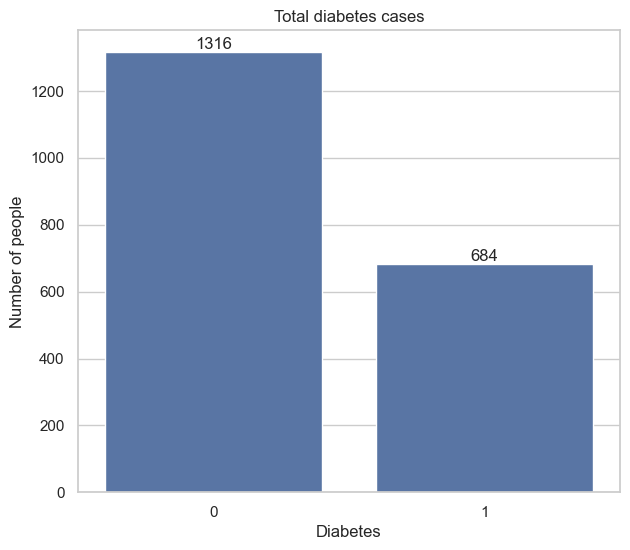

In [233]:
# Distribution of the Outcome attribute
class_counts = df.groupby('Outcome').size() 
print("Class breakdown of the data:\n")
print(class_counts)

# Plot count of non-diabetes and diabetes
plt.figure(figsize=(7,6))
ax = sn.countplot(x='Outcome', data = df)
ax.bar_label(ax.containers[0])
plt.ylabel('Number of people')
plt.xlabel('Diabetes')
plt.title('Total diabetes cases')
plt.show()

Bar plot displays count of patients with and without GDM. 1316 individuals are without GDM, while 648 patients have been diagnosed with GDM. This provides a clear overview of the distribution of GDM status within the dataset, indicating a larger proportion of non-GDM individuals compared to those diagnosed with GDM.

## 1. Skew of attribute distributions

In [234]:
# Skew of attribute distributions
skew = df.skew() 
print("Skew of attribute distributions:") 
print(skew)

Skew of attribute distributions:
Pregnancies                 0.982366
Glucose                     0.158806
BloodPressure              -1.854476
SkinThickness               0.207228
Insulin                     1.996084
BMI                        -0.090455
DiabetesPedigreeFunction    1.811979
Age                         1.181267
Outcome                     0.666633
dtype: float64


Skewness is a measure of asymmetry in a distribution. Blood Pressure stands out with a strong negative skewed. Insulin, Diabetes Pedigree Function, and Age exhibit a high positive skew. The remaining attributes, including Pregnancies and Outcome, show a moderate positive skew. Fortunately, SkinThickness, Glucose, and BMI appear close to a normal distribution.

## 2. Correlation between all pairs of attributes

In [235]:
# Compute correlation matrix:
correlations = df.corr(method = 'pearson') 
print("Correlations of attributes in the data:\n") 
correlations

Correlations of attributes in the data:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


This correlation table shows how attributes are linked. 

- Age (strong +0.54) with pregnancies & diabetes (moderate +0.24). 
- Glucose (moderate +0.32) with insulin & BMI (+0.23). 
- SKinThickness (strong +0.45) with insulin, but slightly lower with age (-0.11). 
- BMI (moderate-strong +0.28-0.45) with Blood Pressure & Insulin, hinting at connections. 

## 3. Univariate Plots:

### 3.1 Histograms

Histograms displays distributions of all attributes in the dataset.

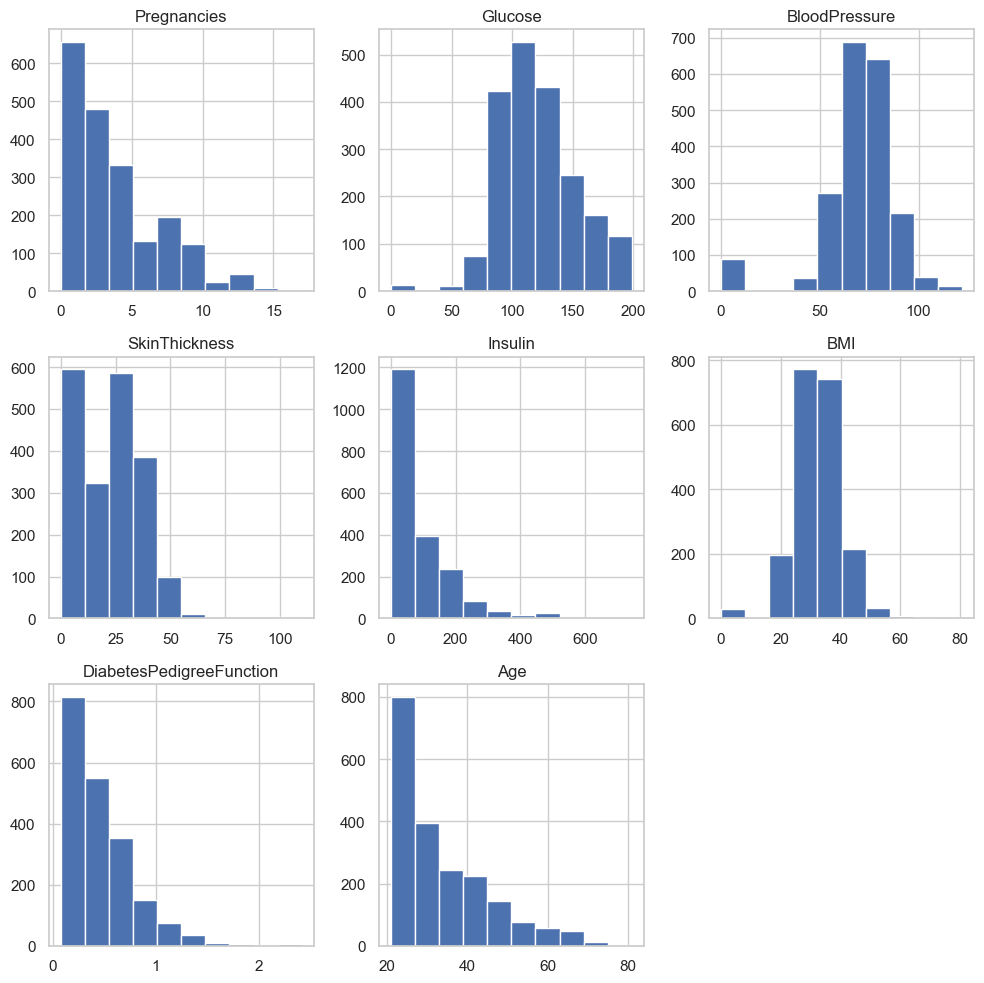

In [236]:
df_num = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_num.hist(figsize = (10,10))
sn.set(style = 'whitegrid')
plt.tight_layout()
plt.show()

### 3.2 Density Plots

<Figure size 800x600 with 0 Axes>

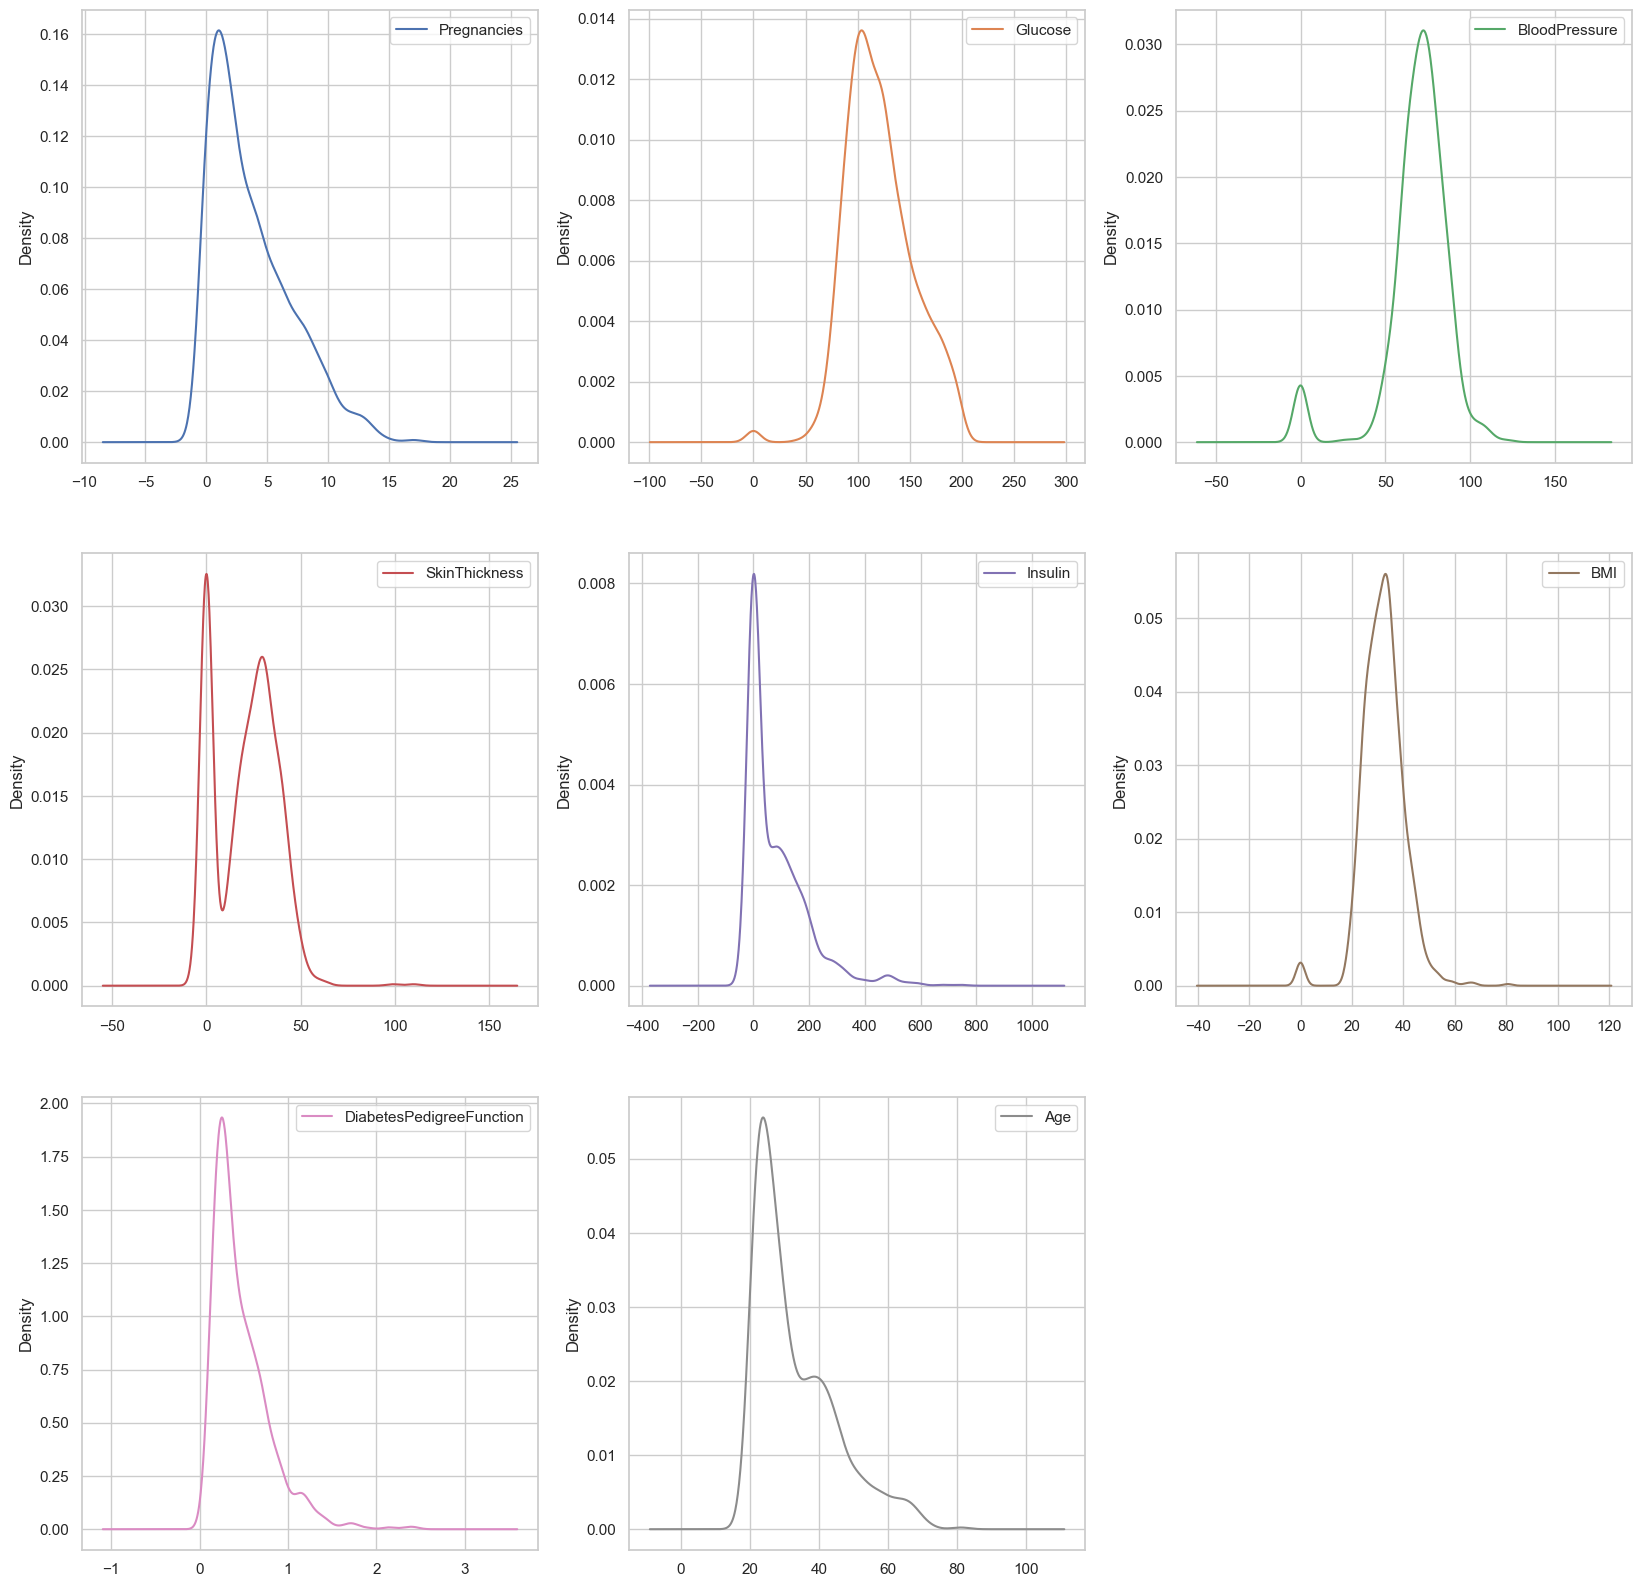

In [294]:
# Density plots for all attributes
fig = plt.figure(figsize = (8, 6))
df_num.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show() 

## 4. Multivariate Plots

### 4.1 Correlation Heatmap

This heatmap provides a visual representation of the correlation between different columns in the dataset, where darker shades indicate stronger correlations (positive or negative), while lighter shades indicate weaker correlations or no correlation. <br>The annotations on the heatmap show the numerical values of the correlations between the columns.

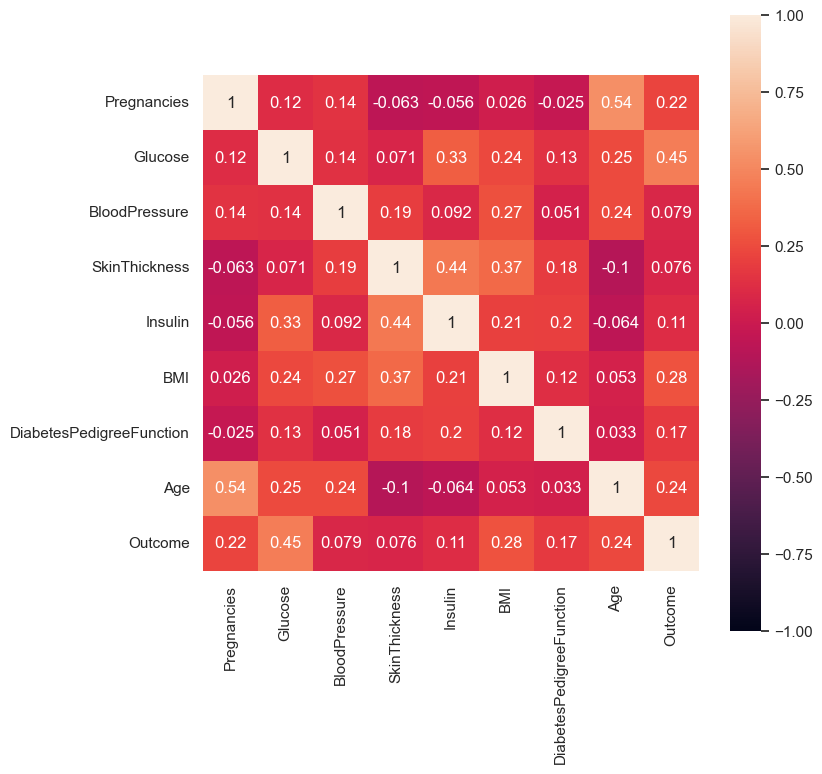

In [289]:
corrmat = df.corr()
fig = plt.figure(figsize = (8, 8))

sn.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

Analyzing the data reveals interesting links: age with both pregnancies (strong +0.54) and diabetes (moderate +0.24). <br> Blood sugar (glucose) moderately correlates with insulin (0.32) and BMI (0.23). <br>Notably, thicker skin (skin thickness) ties to higher insulin (strong +0.45) but is slightly lower with age (-0.11).<br> BMI stands out with moderate to strong positive correlations with blood pressure (0.28), insulin (0.45), and skin thickness (0.39), suggesting potential dependencies. 

### 4.2 Scatter Plot Matrix

Scatter plots are effective for identifying structured relationships between variables. <br>
Attributes that exhibit structured relationships in scatter plots often show correlation and may be considered good candidates for removal from the dataset.

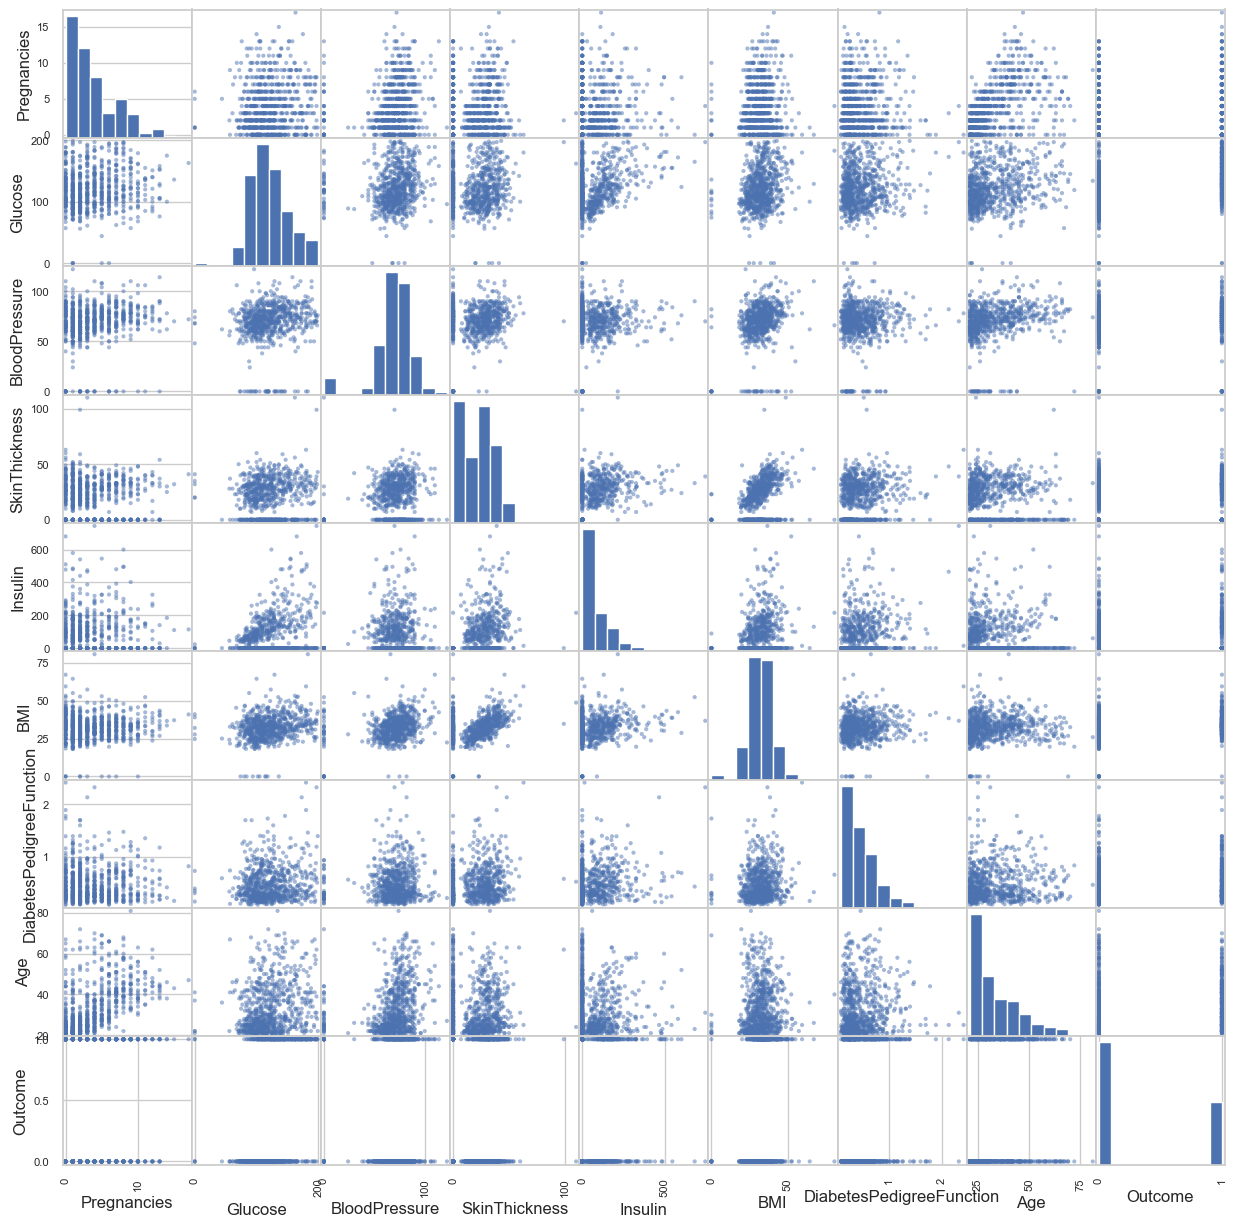

In [296]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [15, 15]

# Plotting Scatterplot Matrix
scatter_matrix(df)
plt.show()

### 4.3 Boxplot

Box and whisker plots showing feature distribution for each outcome class

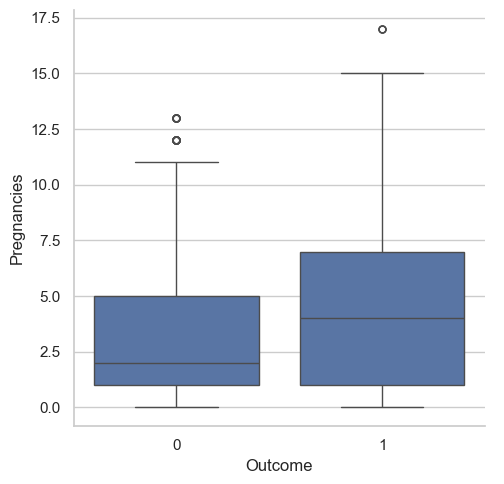

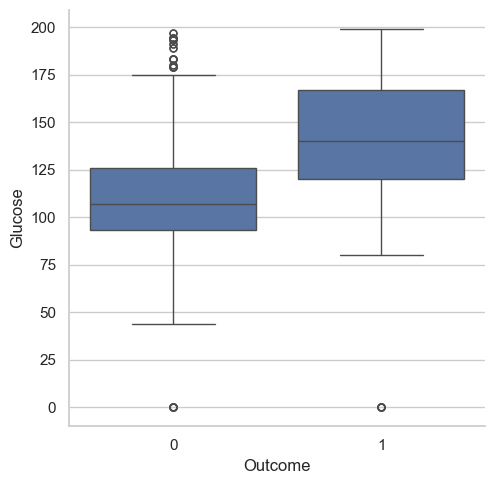

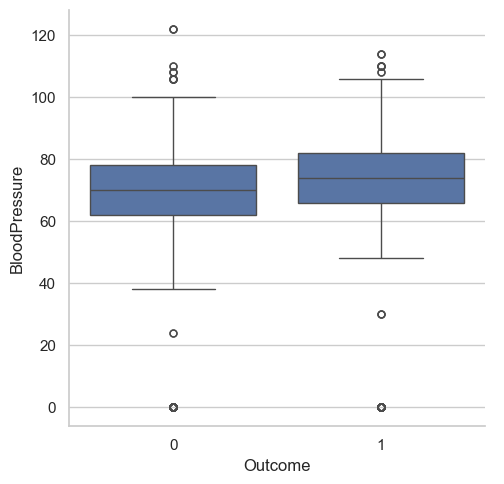

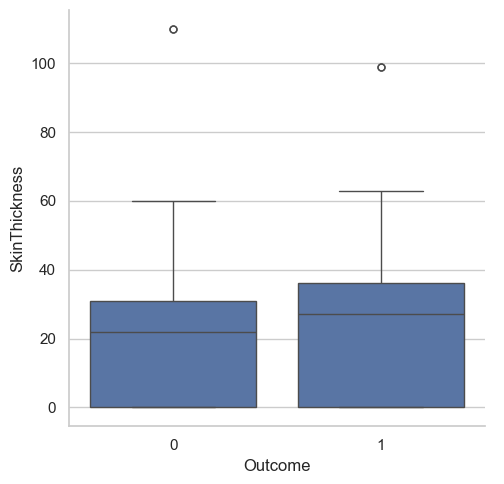

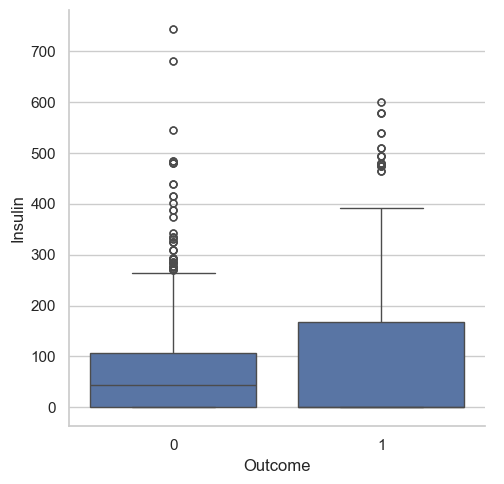

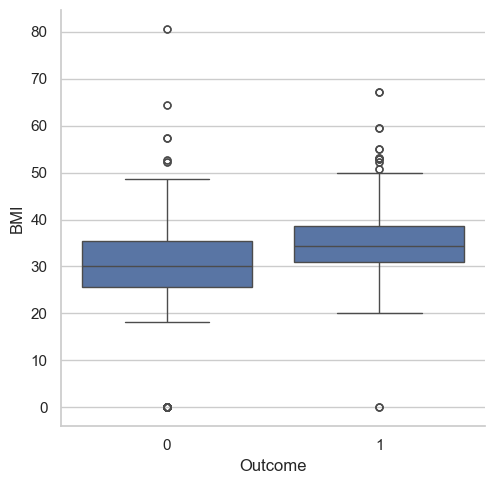

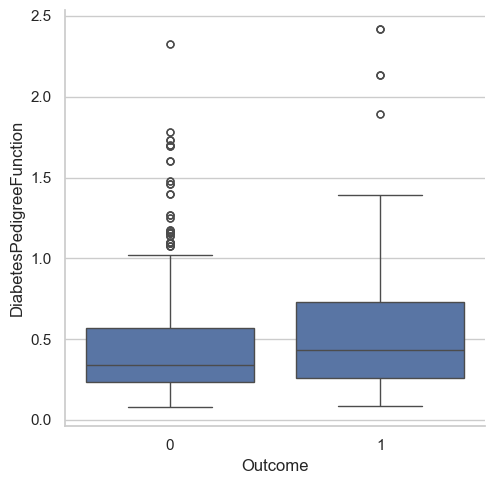

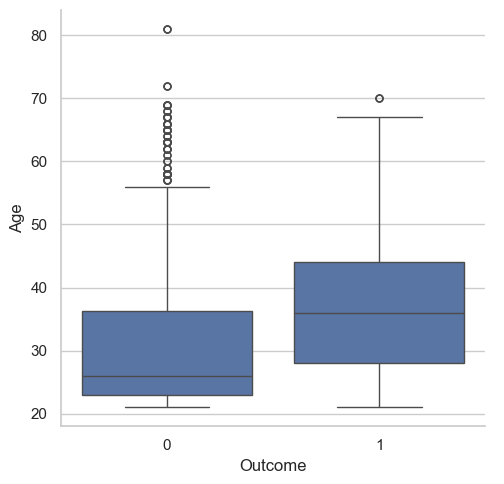

In [240]:
x_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for x in x_columns:
    sn.catplot(x = "Outcome", y = x, kind = "box", data = df)

- If the Glucose is lower than 120, it's very UNLIKELY to have diabetes.
- If the SkinThickness is lower than 20, it's very UNLIKELY to have diabetes.
- If the BMI is lower than 31, it's very UNLIKELY to have diabetes.
- If the Age is lower than 28, it's very UNLIKELY to have diabetes.

# III. Data Pre-processing
---------------------------------------------------------------------------

This code removes duplicated rows from the DataFrame 'df' while keeping the first occurrence of each duplicated row.

In [241]:
# Check duplicated rows
duplicated_count = df.duplicated().sum()
if duplicated_count:
    #Remove duplicated rows
    print(f"Removed {duplicated_count} duplicated row(s)")
    df.drop_duplicates(inplace=True) 
    # Recheck number of rows and columns of the dataset
    data = df.shape
    print(f"--------------------")
    print(f"Number of Rows : {data[0]} \nNumber of Columns : {data[1]}")
else:
    print("No duplicated rows")

Removed 1256 duplicated row(s)
--------------------
Number of Rows : 744 
Number of Columns : 9


Invalid zero values can directly impact the accuracy of ML models. The next step involves addressing these values by imputing them with either mean value or median value depending on each attribute’s distribution. 

In [242]:
# Check '0' values
print("Number of rows has Glucose = 0 is {0}".format(len(df.loc[df['Glucose'] == 0])))
print("Number of rows has BloodPressure = 0 is {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("Number of rows has SkinThickness = 0 is {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("Number of rows has Insulin = 0 is {0}".format(len(df.loc[df['Insulin'] == 0])))
print("Number of rows has BMI = 0 is {0}".format(len(df.loc[df['BMI'] == 0])))
print("Number of rows has DiabetesPedigreeFunction = 0 is {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Number of rows has Age= 0 is {0}".format(len(df.loc[df['Age'] == 0])))

Number of rows has Glucose = 0 is 5
Number of rows has BloodPressure = 0 is 34
Number of rows has SkinThickness = 0 is 215
Number of rows has Insulin = 0 is 359
Number of rows has BMI = 0 is 10
Number of rows has DiabetesPedigreeFunction = 0 is 0
Number of rows has Age= 0 is 0


This code: Replacing the O value from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by either mean value or median value depending upon distribution:
- BloodPressure, Insulin have skewed distributons => replace by Median value
- SkinThickness, Glucose, BMI have normal distributions => replace by Mean value

In [243]:
df_new = df.copy(deep= True)
df_new['Glucose'].replace(0,df_new['Glucose'].mean(axis=0),inplace=True)
df_new['BloodPressure'].replace(0,df_new['BloodPressure'].median(axis=0),inplace=True)
df_new['SkinThickness'].replace(0,df_new['SkinThickness'].mean(axis=0),inplace=True)
df_new['Insulin'].replace(0,df_new['Insulin'].median(axis=0),inplace=True)
df_new['BMI'].replace(0,df_new['BMI'].mean(axis=0),inplace=True)

# IV. Feature Selection
---------------------------------------------------------------------------

In [275]:
# Compute the Pearson correlation coefficients between each feature and the Outcome
correlations = df.corr()['Outcome'].drop('Outcome')  # Drop the 'Outcome' column from the result

# Display the correlations
print("Pearson Correlation Coefficients:")
print(correlations)

Pearson Correlation Coefficients:
Pregnancies                 0.220942
Glucose                     0.453939
BloodPressure               0.078808
SkinThickness               0.075562
Insulin                     0.114655
BMI                         0.278123
DiabetesPedigreeFunction    0.174688
Age                         0.242077
Name: Outcome, dtype: float64


- The Pearson correlation method is commonly employed to identify key traits or features by calculating correlation coefficients between input and output attributes. 
- The Pearson correlation coefficients between each input attribute and the 'Outcome' are as follows:

    Pregnancies: 0.220942 (moderate)

    Glucose: 0.453939 (strong)

    BloodPressure: 0.078808 (weak)

    SkinThickness: 0.075562 (weak)

    Insulin: 0.114655 (weak)

    BMI: 0.278123 (moderate)

    DiabetesPedigreeFunction: 0.174688 (moderate)
    
    Age: 0.242077 (moderate)

# V. Machine Learning Models Development
---------------------------------------------------------------------------

In [245]:
from sklearn.model_selection import train_test_split

# Get 'input' and 'target' columns
X = df_new.drop('Outcome', axis= 1)
y = df_new['Outcome']

# Spitting Data: Train set, Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train size: {X_train.shape} \n X_test size: {X_test.shape}')

X_train size: (595, 8) 
 X_test size: (149, 8)


## 1. Machine Learning Models Development

### 1.1. Logistic Regression

In [280]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

evaluation_results = []

def predict_and_plot(MLmodel, X_train, y_train, X_test, y_test):
    """
    Function to train and predict, caculate evaluation metrics and plot confusion matrix on the training data/test data for machine learning models
    """
    MLmodel.fit(X_train, y_train)
    predicted_value = MLmodel.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, predicted_value):.2f}")
    print(f"Precision: {precision_score(y_test, predicted_value):.2f}")
    print(f"Recall: {recall_score(y_test, predicted_value):.2f}")
    print(f"F1 score: {f1_score(y_test, predicted_value):.2f}")

    evaluation_results.append({
        "Model": str(MLmodel).split("(")[0],
        "Accuracy": format(accuracy_score(y_test, predicted_value), ".2f"),
        "Precision": format(precision_score(y_test, predicted_value), ".2f"),
        "Recall": format(recall_score(y_test, predicted_value), ".2f"),
        "F1 score": format(f1_score(y_test, predicted_value), ".2f"),
    })
    
    #plot confusion matrix
    cfm = confusion_matrix(y_test, predicted_value)
    print(cfm)
    plt.figure(figsize=(8,5))
    sn.heatmap(cfm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Acutal Values')
    plt.title('Confusion Matrix')


    return predicted_value

Accuracy: 0.74
Precision: 0.59
Recall: 0.50
F1 score: 0.54
[[87 16]
 [23 23]]


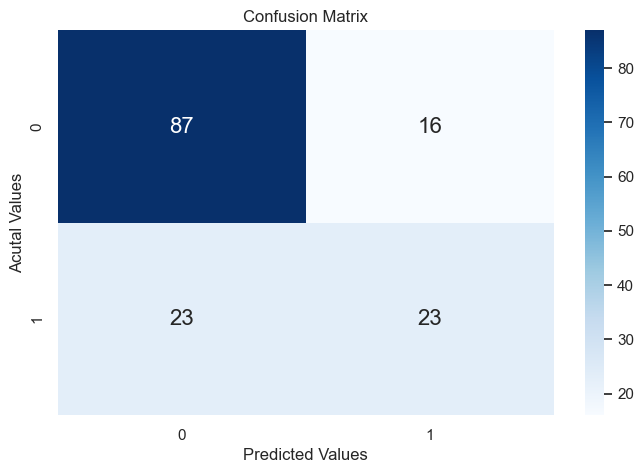

In [281]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(solver='liblinear')
# Predict and plot on the test data
val_preds = predict_and_plot(logistic_reg, X_train, y_train, X_test, y_test)

#### 1.2. Random Forest

Accuracy: 0.74
Precision: 0.58
Recall: 0.57
F1 score: 0.57
[[84 19]
 [20 26]]


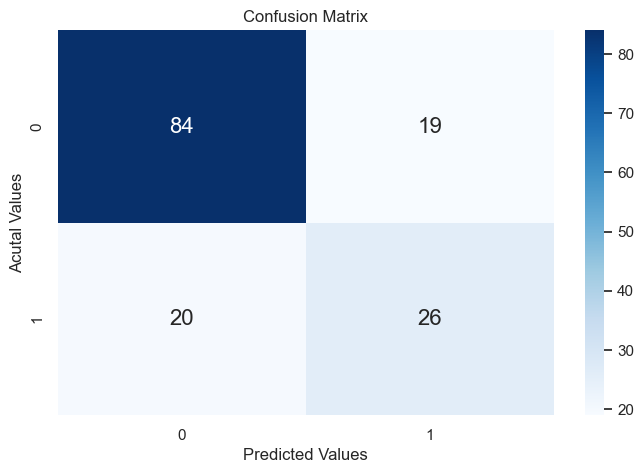

In [282]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
# Predict and plot on the test data
val_preds = predict_and_plot(random_forest, X_train, y_train, X_test, y_test)

### 1.3. Support Vector Machines (SVM)

Accuracy: 0.78
Precision: 0.64
Recall: 0.63
F1 score: 0.64
[[87 16]
 [17 29]]


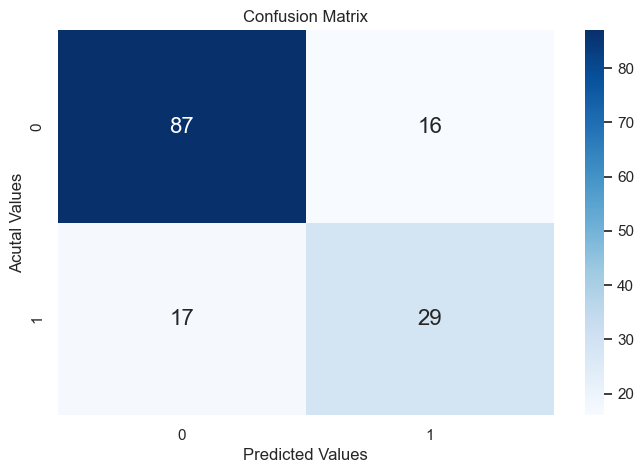

In [283]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
# Predict and plot on the test data
val_preds = predict_and_plot(svm_model, X_train, y_train, X_test, y_test)

In [250]:
df_results = pd.DataFrame(evaluation_results)
df_results

,Model,Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.74,0.59,0.50,0.54
1,RandomForestClassifier,0.74,0.58,0.57,0.57
2,SVC,0.78,0.64,0.63,0.64


## 2. Hyperparameter Optimazation and Tuning

Hyperparameters directly impact model structure, function, and performance, necessitating tuning for optimal results in machine learning. In this study, GridSearch Cross-Validation (GridSearchCV) was employed to automatically identify the best hyperparameter values, improving model performance by streamlining parameter selection and optimization.

Using GridSearchCV for hyperparameter tuning provides key benefits:

- Efficient Hyperparameter Exploration:
    GridSearchCV automates trying out various hyperparameter combinations, saving time and effort compared to manual tuning and allowing thorough exploration of values.
- Risk Reduction of Overfitting:
    GridSearchCV uses cross-validation to estimate model generalization and minimize overfitting risk by ensuring consistent performance across different data subsets.

## 2.1 Logistic Regression Classifier with hyperparameter tuning using GridSearchCV

Accuracy: 0.77
Precision: 0.63
Recall: 0.59
F1 score: 0.61
Parameter used:  {'C': 4.281332398719396, 'dual': False, 'max_iter': 100}
[[87 16]
 [19 27]]


Text(0.5, 1.0, 'Confusion Matrix')

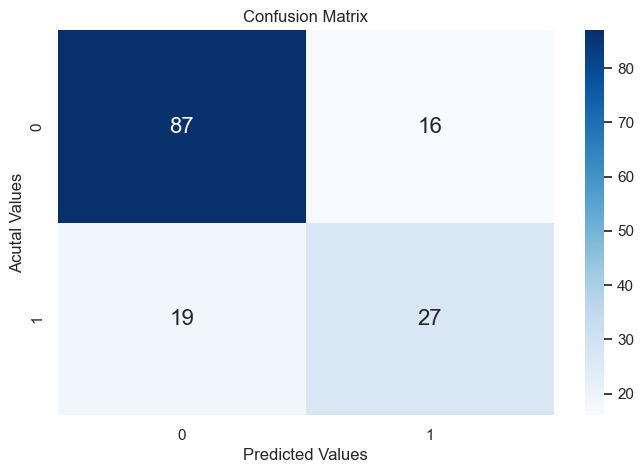

In [298]:
from sklearn.model_selection import GridSearchCV

evaluation_new_results = []

# Define the hyperparameter grid
param_grid = {
    'dual': [False],
    'max_iter': [100,110,120,130,140],
    'C': np.logspace(-4, 4, 20)
}

# Set up the Model and GridSearchCV
model = LogisticRegression(penalty='l2', solver='liblinear', random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Access the best model
best_model = grid_search.best_estimator_


predicted_value = best_model.predict(X_test)

evaluation_new_results.append({
        "Model": "Logistic Regression",
        "Accuracy": format(accuracy_score(y_test, predicted_value), ".2f"),
        "Precision": format(precision_score(y_test, predicted_value), ".2f"),
        "Recall": format(recall_score(y_test, predicted_value), ".2f"),
        "F1 score": format(f1_score(y_test, predicted_value), ".2f"),
})
print(f"Accuracy: {accuracy_score(y_test, predicted_value):.2f}")
print(f"Precision: {precision_score(y_test, predicted_value):.2f}")
print(f"Recall: {recall_score(y_test, predicted_value):.2f}")
print(f"F1 score: {f1_score(y_test, predicted_value):.2f}")
print(f"Parameter used: ", best_params)

# Confusion Matrix
cfm = confusion_matrix(y_test, predicted_value)
print(cfm)
plt.figure(figsize=(8,5))
sn.heatmap(cfm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Acutal Values')
plt.title('Confusion Matrix')

## 2.2 Random Forest classifer with hyperparameter tuning using GridSearchCV

Some parameters to be adjusted:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree / No. of Splits in Dtree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

Accuracy: 0.77
Precision: 0.62
Recall: 0.63
F1 score: 0.62
[[85 18]
 [17 29]]


Text(0.5, 1.0, 'Confusion Matrix')

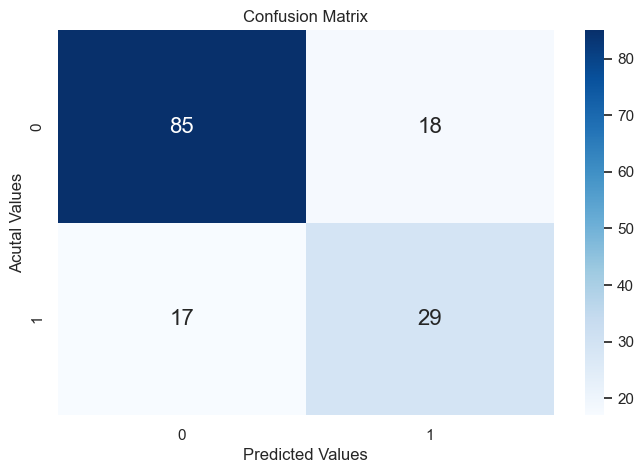

In [284]:
# Define the hyperparameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Set up the Model and GridSearchCV
model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Access the best model
best_model = grid_search.best_estimator_

predicted_value = best_model.predict(X_test)


evaluation_new_results.append({
        "Model": "Random Forest",
        "Accuracy": format(accuracy_score(y_test, predicted_value), ".2f"),
        "Precision": format(precision_score(y_test, predicted_value), ".2f"),
        "Recall": format(recall_score(y_test, predicted_value), ".2f"),
        "F1 score": format(f1_score(y_test, predicted_value), ".2f"),
})
print(f"Accuracy: {accuracy_score(y_test, predicted_value):.2f}")
print(f"Precision: {precision_score(y_test, predicted_value):.2f}")
print(f"Recall: {recall_score(y_test, predicted_value):.2f}")
print(f"F1 score: {f1_score(y_test, predicted_value):.2f}")
print(f"Parameter used: ", best_params)

# Confusion Matrix
cfm = confusion_matrix(y_test, predicted_value)
print(cfm)
plt.figure(figsize=(8,5))
sn.heatmap(cfm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Acutal Values')
plt.title('Confusion Matrix')

## 2.3 SVM classifier with hyperparameter tuning using GridSearchCV

Accuracy: 0.78
Precision: 0.64
Recall: 0.63
F1 score: 0.64
[[87 16]
 [17 29]]


Text(0.5, 1.0, 'Confusion Matrix')

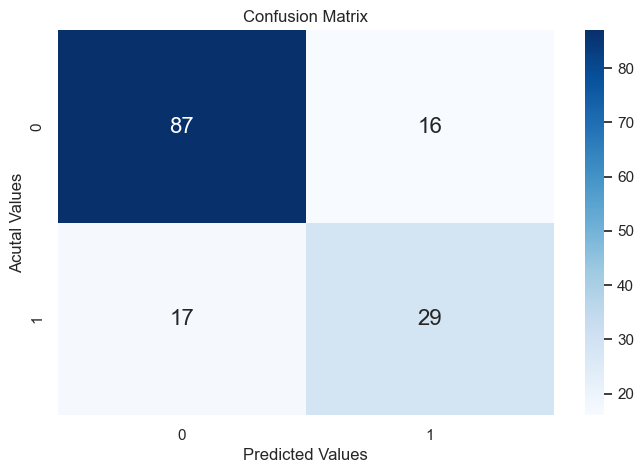

In [285]:
# Define the hyperparameter grid
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
param_grid = {
    'kernel': ['linear','rbf'],
    'C':[1, 10]
}

# Set up the Model and GridSearchCV
model = SVC(random_state=0, probability=True)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Access the best model
best_model = grid_search.best_estimator_

predicted_value = best_model.predict(X_test)


evaluation_new_results.append({
        "Model": "SVC",
        "Accuracy": format(accuracy_score(y_test, predicted_value), ".2f"),
        "Precision": format(precision_score(y_test, predicted_value), ".2f"),
        "Recall": format(recall_score(y_test, predicted_value), ".2f"),
        "F1 score": format(f1_score(y_test, predicted_value), ".2f"),
})
print(f"Accuracy: {accuracy_score(y_test, predicted_value):.2f}")
print(f"Precision: {precision_score(y_test, predicted_value):.2f}")
print(f"Recall: {recall_score(y_test, predicted_value):.2f}")
print(f"F1 score: {f1_score(y_test, predicted_value):.2f}")
print(f"Parameter used: ", best_params)

# Confusion Matrix
cfm = confusion_matrix(y_test, predicted_value)
print(cfm)
plt.figure(figsize=(8,5))
sn.heatmap(cfm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Acutal Values')
plt.title('Confusion Matrix')

In [273]:
df_new_results = pd.DataFrame(evaluation_new_results)
df_new_results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.77,0.63,0.59,0.61
1,Random Forest,0.77,0.62,0.63,0.62
2,SVC,0.78,0.64,0.63,0.64


## 3. Results

Before tuning, the models showed moderate accuracy ranging from 0.74 to 0.78, which improved slightly after tuning, with LR and RF achieving an accuracy of 0.77. Precision and Recall are critical metrics in medical diagnostics like GDM prediction. Before tuning, SVC had the highest precision (0.64) and recall (0.63). After tuning, SVC maintained its strong performance, while LR and RF showed improvements in both precision and recall. The F1 Score, which is a balanced measure of precision and recall, improved across all models after tuning, with SVC consistently performing well in this regard.

Before Hyperparameter Tuning

In [271]:
df_results

,Model,Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.74,0.59,0.50,0.54
1,RandomForestClassifier,0.74,0.58,0.57,0.57
2,SVC,0.78,0.64,0.63,0.64


After Hyperparameter Tuning

In [274]:
df_new_results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.77,0.63,0.59,0.61
1,Random Forest,0.77,0.62,0.63,0.62
2,SVC,0.78,0.64,0.63,0.64


Based on the evaluation, SVC appears to be the most suitable model for GDM prediction both before and after hyperparameter tuning. It consistently achieves the highest scores in accuracy, precision, recall, and F1 score. The tuned SVC model retains its strong performance, making it a robust choice for this classification task.

In conclusion, Support Vector Machine (SVC) is recommended as the preferred model for GDM prediction due to its balanced performance in terms of accuracy, precision, recall, and F1 score. Further fine-tuning and feature selection could potentially enhance its performance even more.